In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
os.chdir('C:/Users/new/Desktop/Practice data science/Assignment2/Activity Recognition from Single Chest-Mounted Accelerometer')

In [21]:
dir_list = os.listdir()

In [33]:
dict_file = {}
column_name = ['index','x','y','z','activity']

In [39]:
list_files = [i for i in dir_list if i[0].isdigit()]
trans_list = sorted([int(i.split('.')[0]) for i in list_files])
csv_list = [str(i) + '.csv' for i in trans_list]

In [40]:
for name in csv_list:
    df = pd.read_csv(name, names = column_name,low_memory = False)
    dict_file[name] = df
print(dict_file)

{'1.csv':            index     x     y     z  activity
0            0.0  1502  2215  2153         1
1            1.0  1667  2072  2047         1
2            2.0  1611  1957  1906         1
3            3.0  1601  1939  1831         1
4            4.0  1643  1965  1879         1
5            5.0  1604  1959  1921         1
6            6.0  1640  1829  1940         1
7            7.0  1607  1910  1910         1
8            8.0  1546  2045  1910         1
9            9.0  1529  2049  1972         1
10          10.0  1637  1978  1945         1
11          11.0  1596  2046  1866         1
12          12.0  1590  2006  1978         1
13          13.0  1601  1966  1957         1
14          14.0  1542  2003  1959         1
15          15.0  1598  2027  1941         1
16          16.0  1511  2258  1983         1
17          17.0  1555  1980  2023         1
18          18.0  1508  2468  1934         1
19          19.0  1580  1697  2005         1
20          20.0  1627  2073  1992         1


In [36]:
print (dict_file['1.csv'])

           index     x     y     z  activity
0            0.0  1502  2215  2153         1
1            1.0  1667  2072  2047         1
2            2.0  1611  1957  1906         1
3            3.0  1601  1939  1831         1
4            4.0  1643  1965  1879         1
5            5.0  1604  1959  1921         1
6            6.0  1640  1829  1940         1
7            7.0  1607  1910  1910         1
8            8.0  1546  2045  1910         1
9            9.0  1529  2049  1972         1
10          10.0  1637  1978  1945         1
11          11.0  1596  2046  1866         1
12          12.0  1590  2006  1978         1
13          13.0  1601  1966  1957         1
14          14.0  1542  2003  1959         1
15          15.0  1598  2027  1941         1
16          16.0  1511  2258  1983         1
17          17.0  1555  1980  2023         1
18          18.0  1508  2468  1934         1
19          19.0  1580  1697  2005         1
20          20.0  1627  2073  1992         1
21        

file # 1.csv


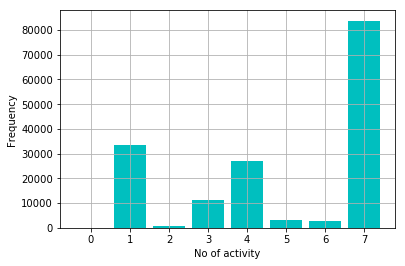

file # 2.csv


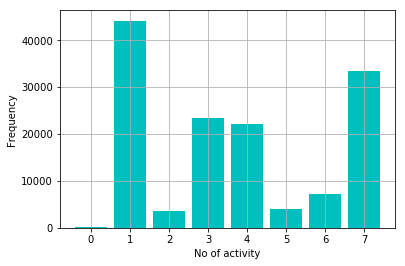

file # 3.csv


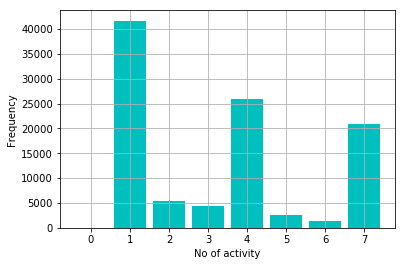

file # 4.csv


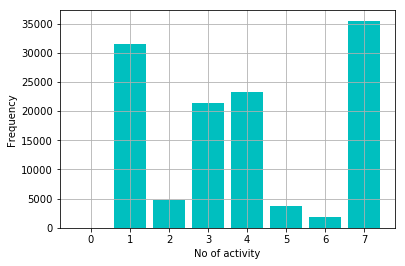

file # 5.csv


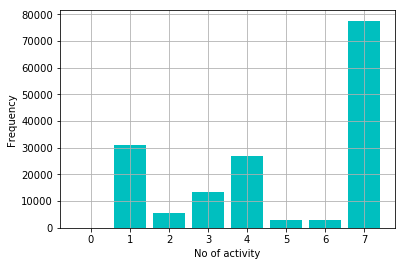

file # 6.csv


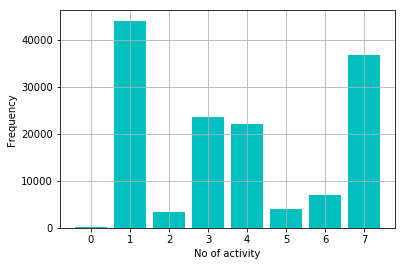

file # 7.csv


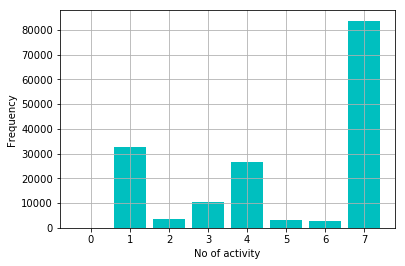

file # 8.csv


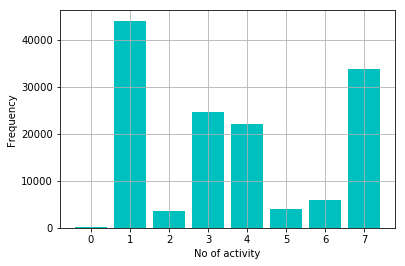

file # 9.csv


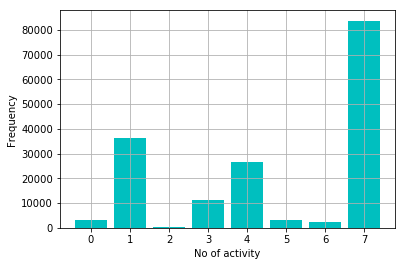

file # 10.csv


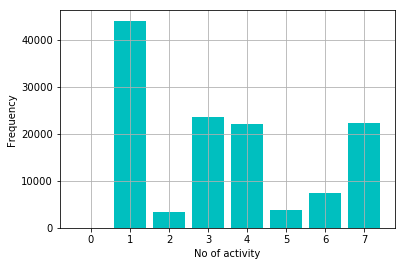

file # 11.csv


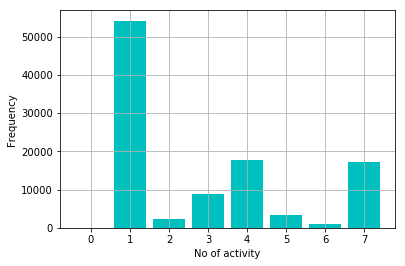

file # 12.csv


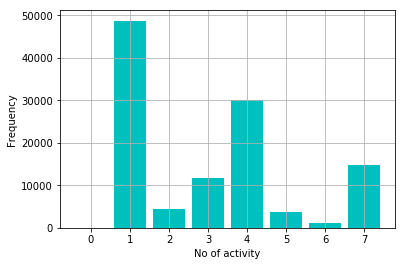

file # 13.csv


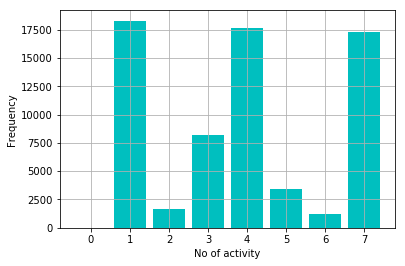

file # 14.csv


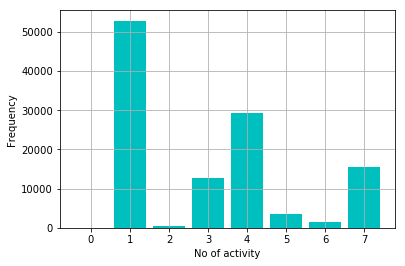

file # 15.csv


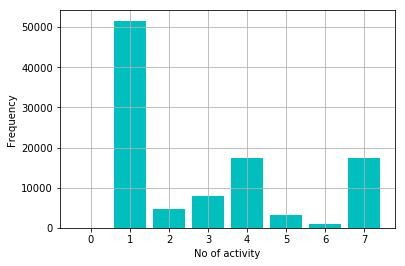

In [41]:
#Visualisation
for file, data in dict_file.items():
    print("file #", file)
    activity_group = data.groupby('activity').size()
    plt.bar(activity_group.index, activity_group.values,color='c')
    plt.ylabel('Frequency')
    plt.xlabel('No of activity')
    plt.grid(True)
    plt.show()

## model

In [44]:
#Data preparation
all = []
labels = list(range(1,len(list_files)+1))   # [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(labels)
for index, item in enumerate(list_files):
    file_table = pd.read_csv(item, names = ['number', 'x', 'y','z','activity'], low_memory=False)
    sLength = file_table.shape[0]
    df = file_table.assign(label = pd.Series([labels[index]]*sLength))
    df_clear = df[df.activity != 0]
    all.append(df_clear)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [45]:
# create new csv file with all cleared 15 sets
df_res = pd.concat(all)
df_res.to_csv('frames.csv', index=None)
data = pd.read_csv('frames.csv', low_memory=False)

In [46]:
#OneClassSVM
#Let's train model on 1 label (testee) and tests it on 7
#Grab train and test frames for trainees 1 and 7 only
from sklearn.preprocessing import StandardScaler
import random
df_train = data[data['label'] == 1]
df_test = data[data['label'] == 7]

train_data = df_train[['x','y','z']]
test_data = df_test[['x','y','z']]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

print('Length of trained scaled data {}'.format(len(train_data_scaled)))
print('Length of test scaled data {}'.format(len(test_data_scaled)))

#let's train our model on the 50000 samples and test it on 10000
train_split = random.choices(train_data_scaled, k =50000)
test_split = random.choices(test_data_scaled, k =10000)

print('Length of trained split data {}'.format(len(train_split)))
print('Length of test split data {}'.format(len(test_split)))

Length of trained scaled data 162500
Length of test scaled data 103500
Length of trained split data 50000
Length of test split data 10000


In [47]:
#OneClassSVM
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_split)

pred_test = clf.predict(test_split)
n_error_test = pred_test[pred_test == -1].size
print ("Error rate on trainee 7 is {}".format(n_error_test/len(pred_test)))

Error rate on trainee 7 is 0.2165


In [48]:
#Now we need to train our set on testee no 1 and test it on 15 scaled data sets
#create additional 3 labels (with scaled x,y,z values)

data_scaled = scaler.fit_transform(data[['x','y','z']])
data['x-scaled'] = data_scaled[:,0]
data['y-scaled'] = data_scaled[:,1]
data['z-scaled'] = data_scaled[:,2]

In [49]:
# create train set by random choice (k = 50000)
df_train = data[data['label'] == 1].loc[:,'x-scaled':'z-scaled'].values
train_split = random.choices(df_train, k = 50000)
#create the dictionary with test data through cycle is impossible due to the 
test_dict = {}
for i in range(1,16):
    df_test = random.choices(data[data['label'] == i][['x-scaled','y-scaled','z-scaled']].values, k = 10000)
    test_dict[i] = df_test
print (test_dict)

{1: [array([-0.8485559 , -0.01296877,  0.5451473 ]), array([-0.26476262, -0.05288467,  1.55053211]), array([-0.74976011,  0.076842  , -0.01575159]), array([-1.45031205,  1.17452918,  0.95788422]), array([-0.74077868,  0.04690507,  0.26998935]), array([-0.15698539, -0.16265339,  1.84685606]), array([-0.13004109, -0.07284262,  1.6034471 ]), array([-0.73179724,  0.05688405,  0.67214328]), array([-0.72281581,  1.42400355,  0.84147125]), array([-1.03716603,  1.09469739,  0.14299338]), array([-1.17188756,  1.81318355,  2.04793302]), array([-1.0281846 ,  0.06686302,  0.75680726]), array([-0.73179724,  0.0369261 , -0.07924958]), array([-1.42336774,  0.58576969,  0.67214328]), array([-0.78568585,  0.06686302,  0.40756833]), array([-0.96531455, -0.01296877,  0.71447527]), array([-0.30966979, -0.07284262,  1.48703412]), array([-0.60605715, -0.05288467,  0.79913925]), array([-0.89346307, -0.4720016 ,  1.40237014]), array([-0.16596683, -0.0429057 ,  1.58228111]), array([-1.29762765, -0.0429057 ,  1

In [ ]:

# Run OneClassSVM per each testee
from time import time
t0 = time()
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(df_train)
for key, value in test_dict.items():
    pred = clf.predict(value)
    n_error_test = pred[pred == -1].size
    print ("The {} testee has error rate {}".format(key, n_error_test/len(pred) * 100))
print ("time on training and prediction:", round(time()-t0, 3), "s")

The 1 testee has error rate 10.43
The 2 testee has error rate 99.92
The 3 testee has error rate 60.46


## model2

In [ ]:

#features and labels extraction from scaled data
features = data[['x-scaled','y-scaled','z-scaled']]
labels = data['label']